In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")


In [3]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic information about the datasets
print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

In [4]:
# Check for missing values
print("Missing values in Customers:")
print(customers.isnull().sum(), "\n")

print("Missing values in Products:")
print(products.isnull().sum(), "\n")

print("Missing values in Transactions:")
print(transactions.isnull().sum(), "\n")

# Check for duplicates
print("Duplicates in Customers:", customers.duplicated().sum())
print("Duplicates in Products:", products.duplicated().sum())
print("Duplicates in Transactions:", transactions.duplicated().sum())

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 

Duplicates in Customers: 0
Duplicates in Products: 0
Duplicates in Transactions: 0


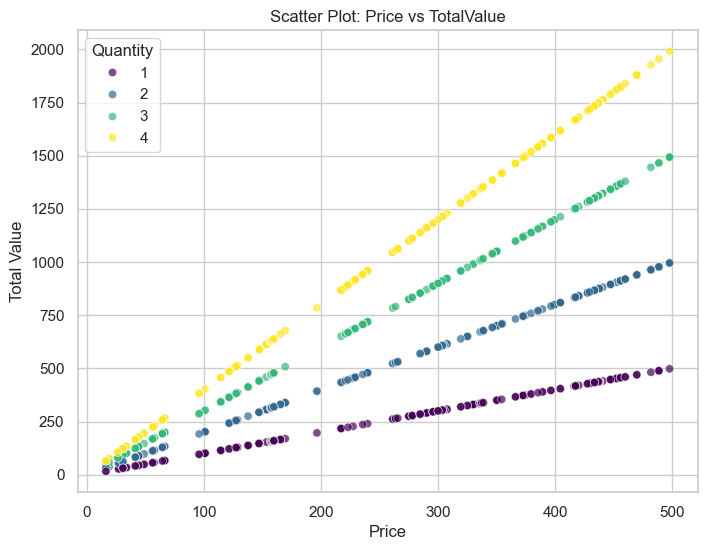

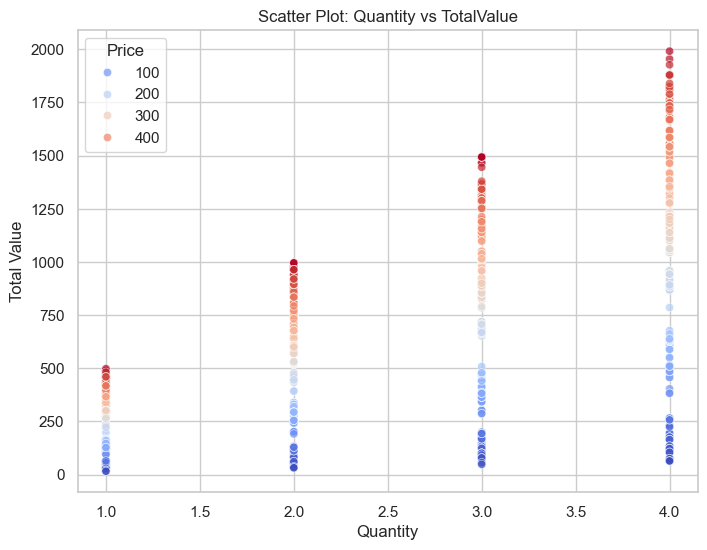

In [5]:
# Scatter plot: Price vs. TotalValue
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Price", y="TotalValue", data=transactions, hue="Quantity", palette="viridis", alpha=0.7)
plt.title("Scatter Plot: Price vs TotalValue")
plt.xlabel("Price")
plt.ylabel("Total Value")
plt.show()

# Scatter plot: Quantity vs TotalValue
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Quantity", y="TotalValue", data=transactions, hue="Price", palette="coolwarm", alpha=0.7)
plt.title("Scatter Plot: Quantity vs TotalValue")
plt.xlabel("Quantity")
plt.ylabel("Total Value")
plt.show()


In [6]:
# Merge Transactions with Customers
merged_data = pd.merge(transactions, customers, on="CustomerID", how="left")

# Merge the result with Products
merged_data = pd.merge(merged_data, products, on="ProductID"
                       
                       , how="left")

# Display the first few rows of the merged dataset
print("Merged Dataset:")
print(merged_data.head())


Merged Dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Spe

In [7]:
# Summary statistics of numerical columns
print("Summary Statistics:")
print(merged_data.describe(), "\n")

# Check unique values in key columns
print("Unique Values:")
print("Regions:", merged_data['Region'].unique())
print("Product Categories:", merged_data['Category'].unique())


Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-

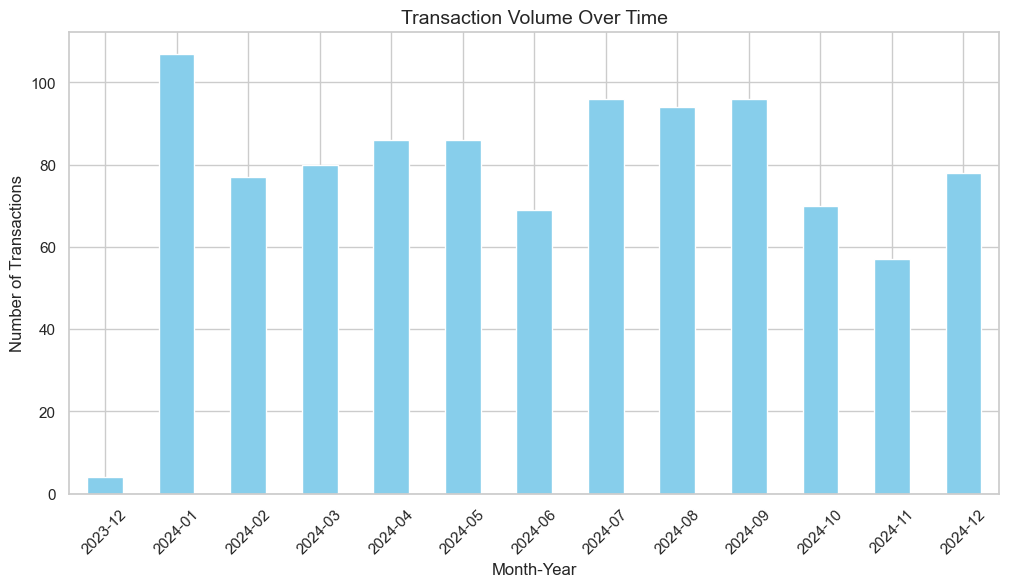

In [8]:
# Plot transaction volume over time
merged_data['TransactionDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color="skyblue")
plt.title("Transaction Volume Over Time", fontsize=14)
plt.xlabel("Month-Year")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


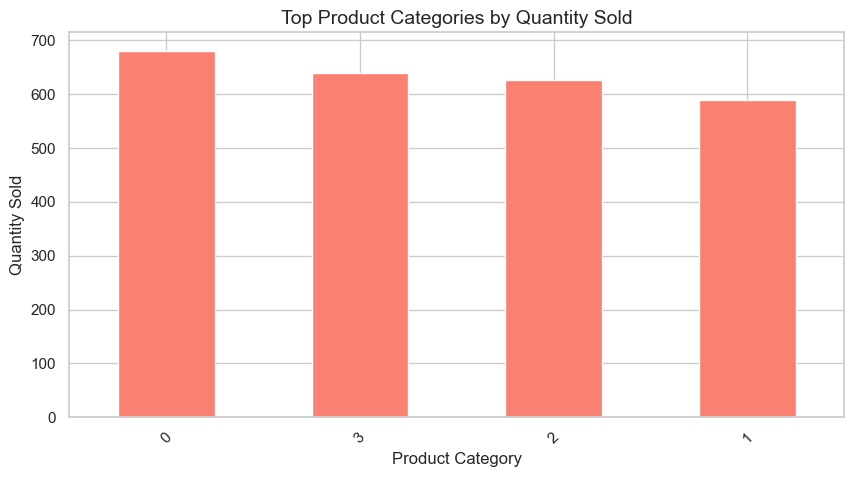

In [16]:
# Quantity sold by category
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Bar plot
category_sales.plot(kind='bar', figsize=(10, 5), color='salmon')
plt.title("Top Product Categories by Quantity Sold", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

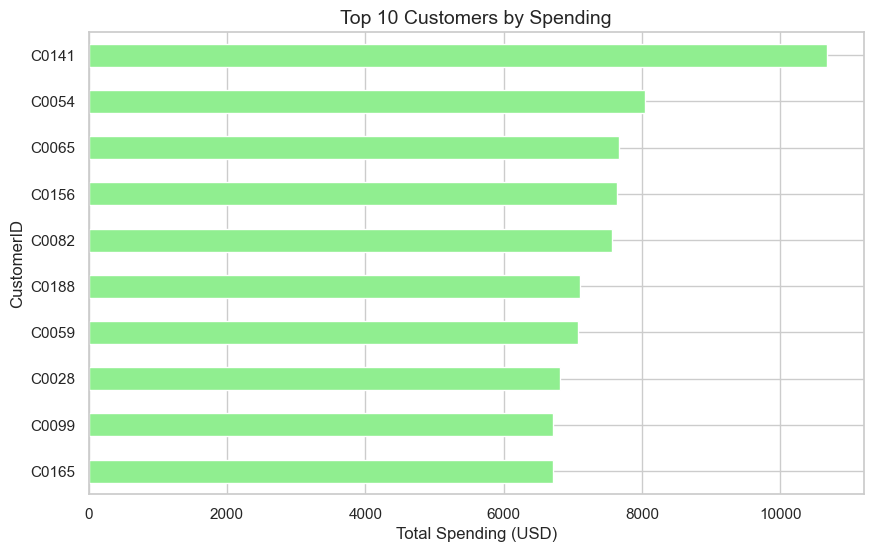

In [17]:
# Total value of purchases by customer
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Horizontal bar plot
customer_spending.plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.title("Top 10 Customers by Spending", fontsize=14)
plt.xlabel("Total Spending (USD)")
plt.ylabel("CustomerID")
plt.gca().invert_yaxis()
plt.show()


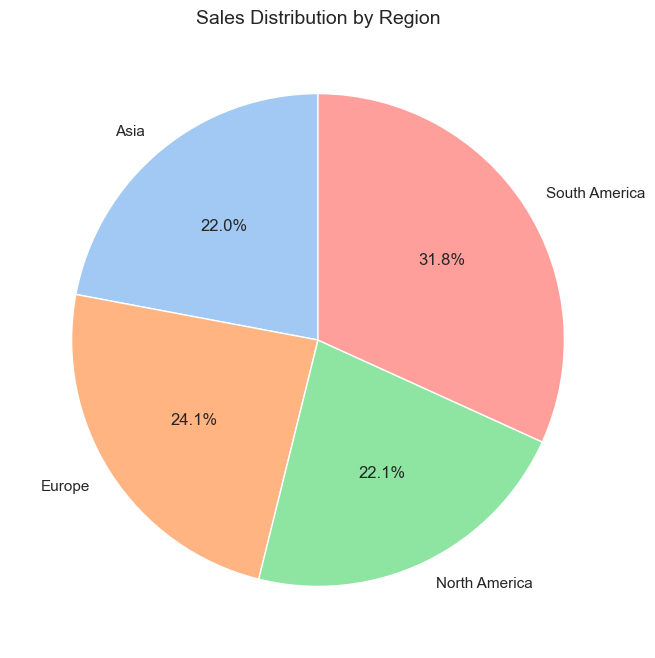

In [11]:
# Sales by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum()

# Pie chart
region_sales.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Region", fontsize=14)
plt.ylabel("")
plt.show()


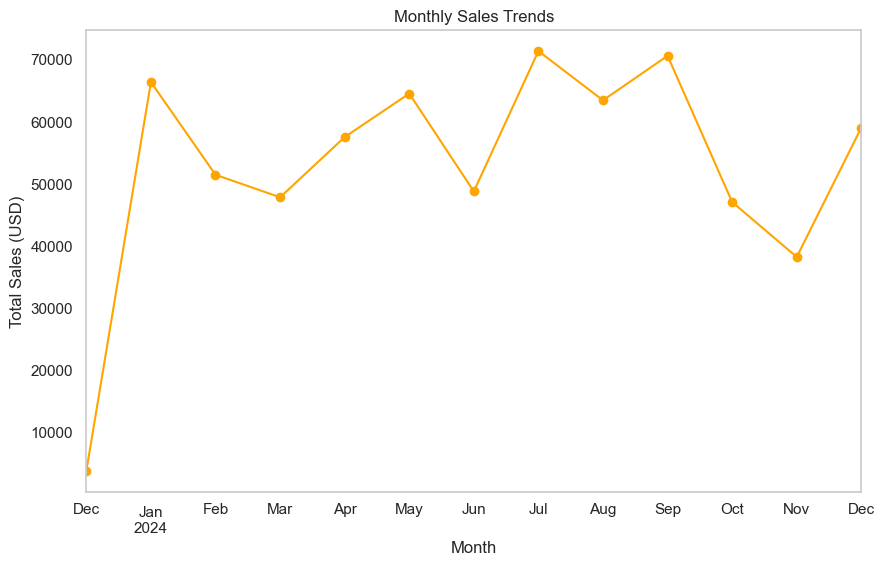

In [12]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()